   # Investigate a Dataset  (TMDb movie data)

- __Introduction__ <br>
    > TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including details about user ratings , popularity and revenue. As the Data Analysis Process begins with the questions we want solve thus we can confer some questions like :  <br>
    - How does the budget and popularity reflecting in the revenue ?
    - Which movie's genre combination made the largest one and the most of the and  profit ?
    - Which month more profitable movies were made ?
    - General findings like largest,lowest and average of budgets, revenue and profit earned ?
    - Which cast appered and which directer directed most of the profitable films?

- __Data Wrangling__ <br>
    > By taking the proposed questions into consideration for the analysis we will now perform the Data Wrangling process with the help of following steps like _Data Acquisition_ and _Data Cleaning_.


In [13]:
## importing all the necessary packages and functions
import csv # to read and write csv files
import pandas as pd # load pandas library
import numpy as np  # load numpy library 
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt # loads library
import seaborn as sns # to make plots more visually appealing
% matplotlib inline  
# magic word to display plots inline with the notebook.

   > Now we are going to take overview of the TMDb movie dataset.

In [14]:
df_tmdb = pd.read_csv('tmdb-movies.csv')  #reading the tmdb-movies csv file.
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> As we can see here in we have 'release_date' and 'release_year' columns so we don't need the 'release_year' column at all , because we can retrieve  the 'release_year' of the movie from the 'release_date' column and and we also have two different fields for id to distinguish movies uniquely so will delete 'imdb_id' and keep the 'id' and we will also delete the 'tagline','keywords','homepage','budget_adj' and 'revenue_adj' column as we won't need them in our analysis at all.
<br>
<br>

In [15]:
drop_col=['release_year','imdb_id','tagline','keywords','homepage','budget_adj','revenue_adj']
df_tmdb = df_tmdb.drop(drop_col, True ) #Returns new object with labels in requested axis removed.

df_tmdb.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3


> Now we will take next step in order to perform data cleaning by removing the rows having null values and duplicate records .

In [16]:
df_tmdb.isnull().sum() #shows all columns and the total NaN of each feature.

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
dtype: int64

In [17]:
df_tmdb[['id','budget','revenue']]=df_tmdb[['id','budget','revenue']].replace(0, np.NaN)
#to replace '0's into NaN of givven coloumn

df_tmdb.dropna(how='all') #drops only if ALL columns are NaN

df_tmdb.dropna(subset=['id','budget','revenue'], inplace=True)
#droping the rows if movie id,budget or revenue  is NaN     

df_tmdb.shape

(3855, 14)

<br>
<br>
> after removing the columns we won't need and droping the rows if movie id,budget or revenue values having NaN we can see above we now have only 3855 rows after data cleaning.
<br>
<br>

In [18]:
df_tmdb.duplicated().sum() #checking for number of duplicate records.

1

In [19]:
df_tmdb.drop_duplicates(inplace=True) #droping the rows which are having duplicacy.

 > In our data cleaning process we droped 'release_year' column as we can retrieve this information from 'release_date' column in order to meet up our one of the research questions , we will convert 'release_date' into standard datatime format or in datetime object.

In [20]:
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date']) 
#convert 'release_date' into standard datetime format

df_tmdb.info()  #inspecting the data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 451.6+ KB


> we can now see the .dtype of 'release_date' column is datetime64 object for further analysis.

- __Exploratory Data Analysis__ <br>
    > After Data Wrangling now we will take another step towards our next Data Analysis Process as we are going to perform Exploratory Data Analysis following the analysis of TMDb dataset to summarize its characteristics, be it by answering the research questions we stated earlier or with visual methods. 
<br>before taking up questions, first lets explore some interesting trends.

Text(0,0.5,'vote_average')

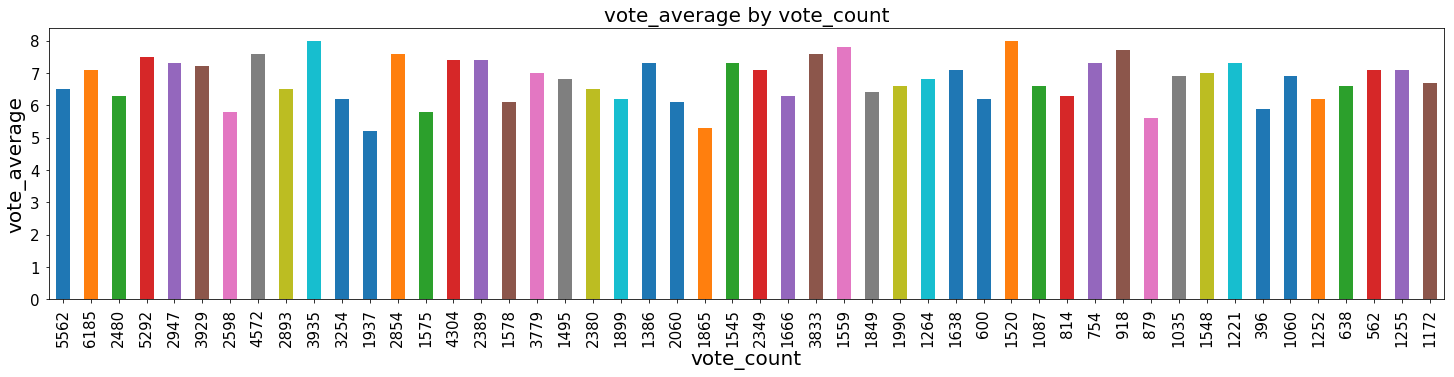

In [23]:
vote_plot = df_tmdb.set_index('vote_count')['vote_average'].head(n=50).plot.bar(figsize=(25,5),title='vote_average by vote_count',fontsize = 15)
#seems like 'vote_average' for various 'vote_count's is pretty much the same  
vote_plot.title.set_size(20) #setting size for the title

vote_plot.set_xlabel('vote_count', size = 20)   #setting x-label with size
vote_plot.set_ylabel('vote_average', size = 20) #setting y-label with size

> In above plot we can see the 'vote_average' value is not changing that much with respect to the 'vote_count' its having pretty much the same 'vote average' values.

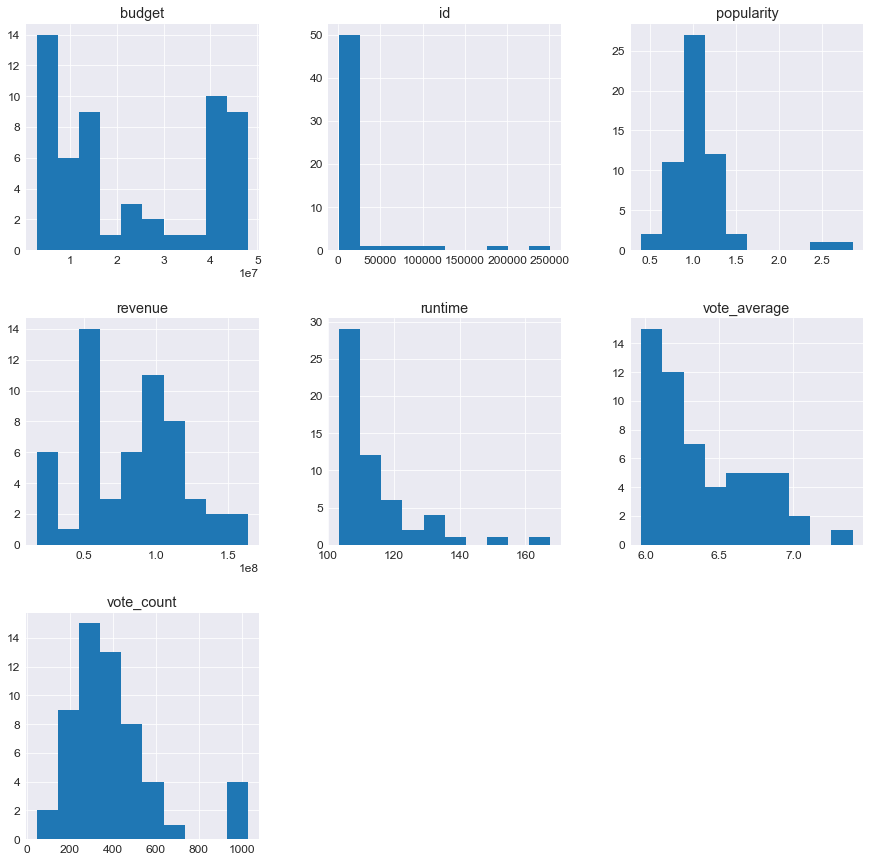

In [35]:
sns.set_style("dark", {'axes.grid' : True}) #to get default seaborn grid off.

df = df_tmdb.groupby(df_tmdb['release_date'].dt.year).mean() 
#to visualise possible trends over time

df.hist(figsize=(15,15)); #defining histogram size

 > taking look over above histograms we can visualise trends over time however which grouped the movies based on its release year then we take mean for each grouped attribute for each year and ploted above histograms.

- __How does the budget and popularity reflecting in the revenue ?__

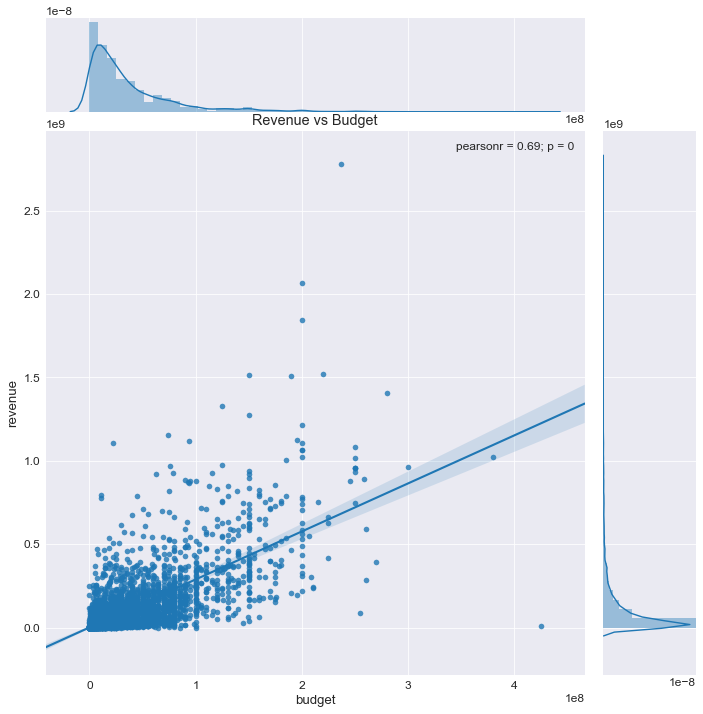

In [36]:
sns.set_context("paper", font_scale=1.5)  #setting font size for our plot

sns.jointplot(x='budget', y='revenue',data=df_tmdb,kind="reg",size=10)
#to draw plot between 'revenue' and 'budget' using seaborn.jointplot() and arguments 
#'kind' is to give regression line 'size' for plot size. 

plt.title('Revenue vs Budget'); # to give title to plot

> As we look through above plot between revenue and budget we have plot with bivariate and univariate graphs.as the
The histogram on the top is showing the __distribution of the 'budget'__ and he histogram to the right shows the __distribution of 'revenue'__ and the scatter plot is as usual between 'budget' and 'revenue' .The __Pearson correlation coefficient__ and _P-value_ calculated also given at right upper side and we also have the best-fitting line (__Regression line__) to best predict the 'revenue' for every budget value now same we are going to do with 'popularity' and 'revenue'.
<br>
<br>

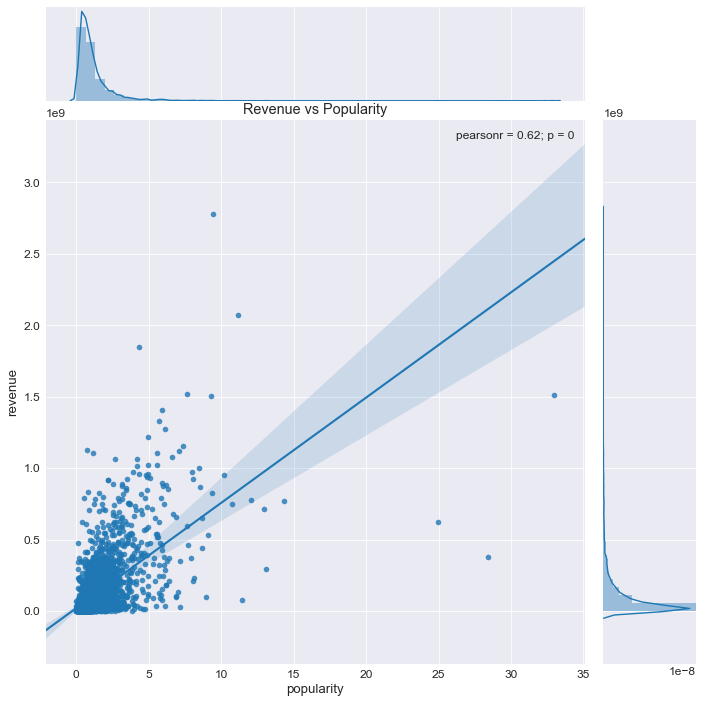

In [37]:
sns.jointplot(x='popularity', y='revenue',data=df_tmdb,kind="reg",size=10)
#to draw plot between 'revenue' and 'popularity' using seaborn.jointplot() and arguments 
#'kind' is to give regression line 'size' for plot size. 

plt.title('Revenue vs Popularity'); # to give title to plot

> by observing the above two plots we now can clearly see how budget and popularity reflecting in the revenue how they correlated to each other by _Pearson correlation coefficient_ defined and also can best predict the revenue using _Regression line_ between them.
<br>
<br>

- __Which movie's genres combination made the largest one and the most of the and profit ?__

In [38]:
df_tmdb.genres.unique() #this will give us the unique genres availabe.

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [39]:
df_tmdb.insert(5,'profit',df_tmdb['revenue']-df_tmdb['budget']) 
#inserting 'profit' column to get profit corresponding genre

In [40]:
df_tmdb.head() 

,id,popularity,budget,revenue,original_title,profit,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,1.363529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,2.284364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,1.852382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,1.868178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,1.316249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3


In [41]:
r = df_tmdb.groupby('genres')['profit'].sum() #making total of a profit for corresponding grouped genres.
r.max()   #the maximum collective profit earned by the genre. 

12183078642.0

In [42]:
r.sort_values(ascending = False, inplace = True) #sorting values in descending order. 
r.head(2)         #we get the most profitable one at first two gernes

genres
Comedy    1.218308e+10
Drama     9.050103e+09
Name: profit, dtype: float64

>As we can see here the _"Comedy"_ movie genre made the of the profit in camparison to other gernes whereas _"Drama"_ comes at second place.

In [43]:
print(df_tmdb[['original_title', 'genres']][df_tmdb.profit == df_tmdb.profit.max()],df_tmdb['profit'].max())
#to get the 'original_title' and 'genres' details whose profit is equal to maximum in the profit column
#and the details of maximum value in profit column also.


     original_title                                    genres
1386         Avatar  Action|Adventure|Fantasy|Science Fiction 2544505847.0


> we can see here 'Avatar' is the largestest profitable movie which has "Action|Adventure|Fantasy|Science Fiction" genres combo with the profit of 2544505847.

- __Which month more profitable movies were made ?__

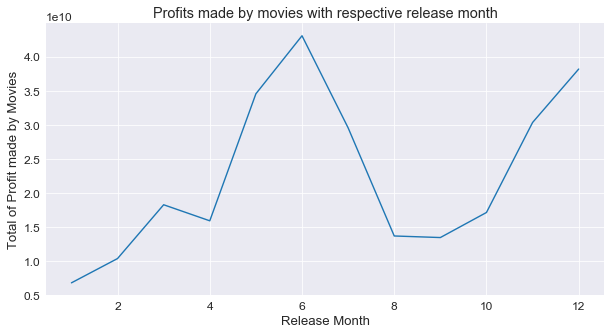

In [44]:
plt.figure(figsize=(10,5)) #improving figure size
profits_month = df_tmdb.groupby(df_tmdb['release_date'].dt.month)['profit'].sum()
#to collect the movies with grouped by its 'release month' and then their respective profits are added 
#and stored in variable 'profits_month'
plt.title('Profits made by movies with respective release month') #title of the plot
plt.xlabel('Release Month')         # labelling X-axis
plt.ylabel('Total of Profit made by Movies') # labelling Y-axis
plt.plot(profits_month);            #plotting

> looking through above plot it seems to have maximum profit in around 6th month and minimum around first, after doing calculation below will draw the conclusion about it.

In [45]:
profits_month.max() #maximum grossed profit

43051063813.0

In [46]:
profits_month.sort_values(ascending = False, inplace = True) #sorting values in descending order. 
profits_month.head(1) #to get the month with the maximum profit

release_date
6    4.305106e+10
Name: profit, dtype: float64

In [47]:
profits_month.sort_values(ascending = True, inplace = True) #sorting values in ascending order. 
profits_month.head(1)   #to get the month with the minimum profit

release_date
1    6.865809e+09
Name: profit, dtype: float64

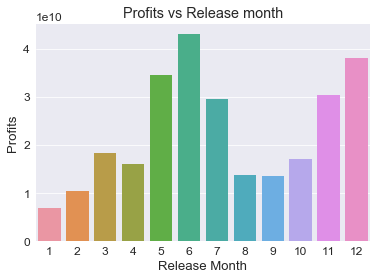

In [48]:
sns.barplot(profits_month.index, profits_month.values)
plt.title('Profits vs Release month')
plt.xlabel('Release Month')
plt.ylabel('Profits');

> As we can see in the exploration and the given line plot as we go through the movies released in starting months  have less profit earned as the movies released in the __first month(January)__ grossed __least profit__ which is around 6.86B and after it increases gradually and we can see movies released in the __6-th month (June)__ grossed a __maximum profit__ which is 43.05B, and thereafter having some decline in profit, after movies released around _9-th month_ (Sept) profit grossed again increases throughout.

- __ General findings like largest,lowest and average of budgets, revenue and profit earned ?__

In [49]:
df_tmdb.describe() #describing dataframe

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,527.720291,6.168163
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,879.956821,0.794920
min,5.000000,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,71.000000,5.700000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,204.000000,6.200000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,580.000000,6.700000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000


In [50]:
df_tmdb['profit'].mean() #the mean of the profit column

70482919.14322782

In [51]:
most_profit = df_tmdb[df_tmdb['profit'] >= df_tmdb['profit'].mean()]
#making new dataframe having profits greater than the 'profit' mean (signficant profit).

most_profit.index = range(len(most_profit)) #reindexing 'most_profit' dataframe
#most_profit.index = most_profit.index + 1  #will initialize dataframe from 1 instead of 0

most_profit.head(5) #showing the dataset

,id,popularity,budget,revenue,original_title,profit,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,1.363529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,2.284364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,1.852382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,1.868178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,1.316249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3


In [52]:
"Average budget of profitable movies : {}".format(most_profit['budget'].mean())

'Average budget of profitable movies : 66525485.24577861'

In [53]:
"Average revenue of profitable movies : {}".format(most_profit['revenue'].mean())

'Average revenue of profitable movies : 295445263.5703565'

In [54]:
"Average runtime of profitable movies : {}".format(most_profit['runtime'].mean())

'Average runtime of profitable movies : 114.66697936210132'

- __Which cast appered and which directer directed most of the profitable films?__

In [55]:
# we can see above casts and some directors are also seperated by '|' we will use function to take
# column name as argument and return the top most apearred attribute with number of time it is apearred.
def most_ap(column_name):
    
    cast_profitable = most_profit[column_name].str.cat(sep = '|')
    cast_profitable = pd.Series(cast_profitable.split('|')) 
    #giving pandas series and storing the column's values separately after split. 

    num = cast_profitable.value_counts(ascending = False) #sorting values in descending order.
    return (num.head())  #return the top of most apearred attribute

In [56]:
cast_l=most_ap('cast')
cast_l

Tom Cruise            26
Sylvester Stallone    20
Brad Pitt             20
Tom Hanks             20
Adam Sandler          19
dtype: int64

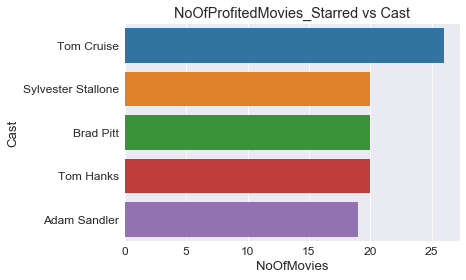

In [57]:
sns.barplot(cast_l.values,cast_l.index) ; 
#barplot showing barplot for top 5 casts starred in most of the profitable films

plt.title('NoOfProfitedMovies_Starred vs Cast')
plt.xlabel('NoOfMovies')
plt.ylabel('Cast');

> As we see bar plot and results when it comes to starring in most of the profitable movies "__Tom Cruise__" takes the first place casted in 26 movies, following there is "__Sylvester Stallone__","__Brad Pitt__" and "__Tom Hanks__" at second place starring in equal number of movies which 20 and "__Adam Sandler__" at third place in starring in 19 movies while the movies have profit around over 70.48 million +.

In [58]:
director_l=most_ap('director')
director_l

Steven Spielberg    22
Robert Zemeckis     12
Ridley Scott        10
Tim Burton           9
Ron Howard           8
dtype: int64

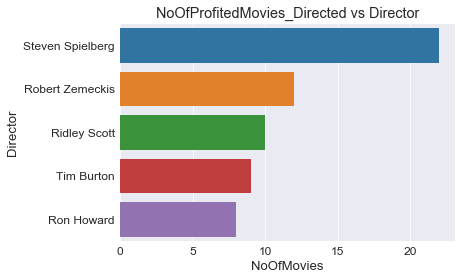

In [59]:
sns.barplot(director_l.values,director_l.index) ; 
#barplot showing barplot for top 5 directors who directed most of the profitable films
plt.title('NoOfProfitedMovies_Directed vs Director')
plt.xlabel('NoOfMovies')
plt.ylabel('Director');

> And in the directors looking the barlot and the values "__Steven Spielberg__" takes the first spot in directing the most of the profitable movies, directing 22 movies which has profits of over 70.48M+. following along the "__Robert Zemeckis__" who is at second place having 12 movies of profit of over 70..48M+ .

- __Conclusion__ <br>
    > After performing all the analysis if we want to make any profitable and successful Movie we will use following formulas as : <br>
   -__Budget :__ Budget of the movie should be around 66.52 millon. <br>
   -__Runtime :__ Runtime of the movie should be around 114.66 minutes.<br>
   -__Cast :__ Movie should have Tom Cruise or any of one these Sylvester Stallone,Brad Pitt or Tom Hanks as a starrer.<br>
   -__Director :__ Steven Spielberg would be best choice as a director.<br>
   -__Genre :__ Movie should have Comedy as a genre.<br>
   -__Release Date :__ Movie should be released most preferably in either "May" or "December".<br>

- __Limitations__ <br>

> By following above formula we have high probability of making profitable and successful movie but it's not completly true as data provided might have some errors and as we have seen in our exploration the buget and revenue column had many erroneous zero values which would have definitely affected our analysis whereas droping rows with missing values could have effect on our overall analysis, and also they don't having currency unit as movies might have made in different countries which could surely affect our analysis we have to apply some sort of normalization to  triumph over it. And also we dont know about how the 'vote_counts' are taken and popularity is computed these could depend on the  different mediums through which it had been concluded , and also there could be some influantial factors that we should take care of. <br>